In [1]:
import numpy as np
import astropy.io.fits as ft
import matplotlib.pyplot as plt
import pandas as pd
from skimage import io
from skimage import transform
from skimage.transform import rescale, resize, downscale_local_mean
from scipy.ndimage import rotate

In [2]:
#ff = ft.open('frame-g-004900-2-0143_new.fits',uint=True)
ff = ft.open('NGC_2403_SDSS_g_bms2014.fits',uint=True)
#ff = ft.open('NGC_2403.fits', uint = True)

In [3]:
hdr=ff[0].header
type(hdr)
hdr

SIMPLE  =                    T / This is a FITS file                            
BITPIX  =                  -32 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                 2727 / NUMBER OF ELEMENTS ALONG THIS AXIS             
NAXIS2  =                 2727 / NUMBER OF ELEMENTS ALONG THIS AXIS             
EXTEND  =                    T / This file may contain FITS extensions          
EQUINOX =        2000.00000000 / Mean equinox                                   
RADECSYS= 'ICRS    '           / Astrometric system                             
CTYPE1  = 'RA---TAN'           / WCS projection type for this axis              
CUNIT1  = 'deg     '           / Axis unit                                      
CRVAL1  =   1.142000000000E+02 / World coordinate on this axis                  
CRPIX1  =   1.364000000000E+03 / Reference pixel on this axis                   
CD1_1   =  -1.099999994040E-

In [4]:
img=ff[0].data
ff.close()
type(img)
img.shape

(2727, 2727)

In [5]:
xx=hdr['naxis1']
yy=hdr['naxis2']

C1 = hdr['CRPIX1']                                               
C2 = hdr['CRPIX2']
img1=np.zeros((yy,xx))

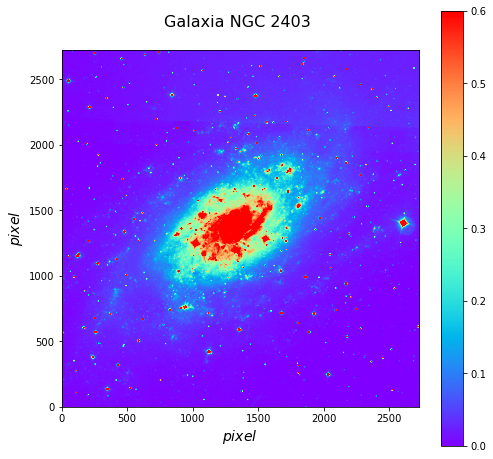

In [6]:
import matplotlib.pyplot as plt
#plt.imshow(img,cmap='Greys',vmin=0,vmax=1)
plt.figure(figsize = (8,8),edgecolor='k')
plt.imshow(img, cmap='rainbow', vmin=0,vmax=0.6, origin='lower')     # Aquí centramos la imagen y aplicamos 
#plt.imshow(img, cmap='rainbow', vmin=1000,vmax=3000, origin='lower')     # Aquí centramos la imagen y aplicamos 
plt.title('Galaxia NGC 2403 \n',fontsize=16)
plt.ylabel('$pixel$',fontsize=14)
plt.xlabel('$pixel$',fontsize=14)
#plt.ylim(1000,2090)
#plt.xlim(1000,2073)
plt.colorbar()

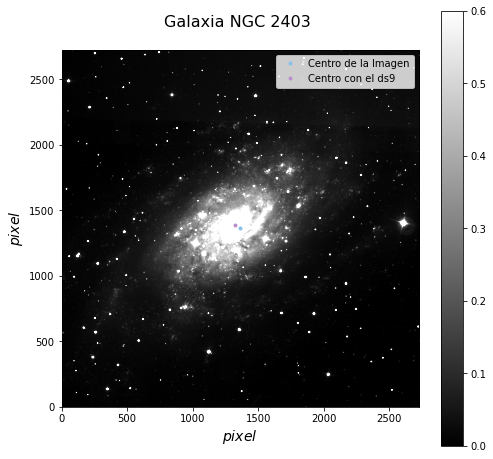

In [7]:
import matplotlib.pyplot as plt
#plt.imshow(img,cmap='Greys',vmin=0,vmax=1)
plt.figure(figsize = (8,8),edgecolor='k')
plt.imshow(img, cmap='gray', vmin=0,vmax=0.6, origin='lower')     # Aquí centramos la imagen y aplicamos 
#plt.imshow(img, cmap='gray', vmin=1000,vmax=2000, origin='lower')     # Aquí centramos la imagen y aplicamos 
plt.plot(C1,C2, '.', color = '#85C1E9', label ='Centro de la Imagen')
#plt.plot(1306.3282,1368.5608, '.', label = 'Centro con el ds9')
plt.plot(1323.6082,1387.5688,'.',color = '#BB8FCE', label = 'Centro con el ds9')
plt.title('Galaxia NGC 2403 \n',fontsize=16)
plt.ylabel('$pixel$',fontsize=14)
plt.xlabel('$pixel$',fontsize=14)
#plt.ylim(1000,2090)
#plt.xlim(1000,2073)
plt.legend()
plt.colorbar()

a =  758.1593009286901
b =  408.6263059969095


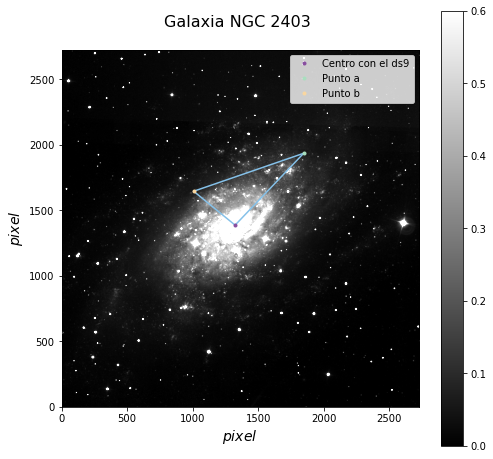

In [8]:
# Encontrando el centro
CX = 1323.6082
CY = 1387.5688

punto1 = [1323.6082,1387.5688]
punto2 = [1846.96,1936.12]
punto3 = [1007.36,1646.34]


a = np.sqrt((punto1[0]-punto2[0])**2 +(punto1[1]-punto2[1])**2)
print("a = ",a)
b = np.sqrt((punto1[0]-punto3[0])**2 +(punto1[1]-punto3[1])**2)
print("b = ",b)

plt.figure(figsize = (8,8),edgecolor='k')
plt.imshow(img, cmap='gray', vmin=0,vmax=0.6, origin='lower')     # Aquí centramos la imagen y aplicamos 

plt.plot([punto1[0],punto2[0]],[punto1[1],punto2[1]], color = '#85C1E9')
plt.plot([punto1[0],punto3[0]],[punto1[1],punto3[1]], color = '#85C1E9')
plt.plot([punto2[0],punto3[0]],[punto2[1],punto3[1]], color = '#85C1E9')
plt.plot(punto1[0],punto1[1],'.', color = '#884EA0', label = 'Centro con el ds9')
plt.plot(punto2[0],punto2[1],'.', color = '#A9DFBF', label = 'Punto a')
plt.plot(punto3[0],punto3[1],'.', color = '#FAD7A0', label = 'Punto b')


plt.title('Galaxia NGC 2403 \n',fontsize=16)
plt.ylabel('$pixel$',fontsize=14)
plt.xlabel('$pixel$',fontsize=14)
#plt.ylim(1000,2090)
#plt.xlim(1000,2073)
plt.legend()
plt.colorbar()

In [9]:
θ = np.arctan(b/a)
θ = np.rad2deg(θ)
i = 90 - θ 
i_real = 61.3
Err = abs(i-i_real)/i_real*100
print("La inclinación entre la línea de visión y el eje polar de una galaxia. i = {:.2f}°".format(i))
print("Con un {:2f}% de error respecto al valor real".format(Err))

La inclinación entre la línea de visión y el eje polar de una galaxia. i = 61.68°
Con un 0.614347% de error respecto al valor real


In [10]:
data = pd.read_csv("alex2.dat", sep = '\s+')
data

,row,SMA,INTENS,INT_ERR,PIX_VAR,RMS,ELLIP,ELLIP_ERR,PA
0,1,0.0,2.1500,INDEF,INDEF,INDEF,INDEF,INDEF,INDEF
1,2,5.0,1.7600,0.00432,0.0323,0.0228,0.2191,0.0254,-72.78
2,3,10.0,1.7600,0.0104,0.0855,0.0605,0.6599,0.0557,-75.88
3,4,15.0,1.6300,0.00776,0.0918,0.0649,0.4113,0.0550,-75.90
4,5,20.0,1.5600,0.0113,0.156,0.11,0.4113,INDEF,-75.90
...,...,...,...,...,...,...,...,...,...
156,157,780.0,0.0789,0.00129,0.111,0.0783,0.4113,INDEF,-75.90
157,158,785.0,0.0869,0.00553,0.476,0.336,0.4113,INDEF,-75.90
158,159,790.0,0.0740,0.00113,0.0975,0.0689,0.4113,INDEF,-75.90
159,160,795.0,0.0725,0.00106,0.0921,0.0651,0.4113,INDEF,-75.90


In [11]:
PA = data['PA'][1:].astype(float, errors = 'raise')
np.mean(PA), np.median(PA)

(-75.88037499999979, -75.9)

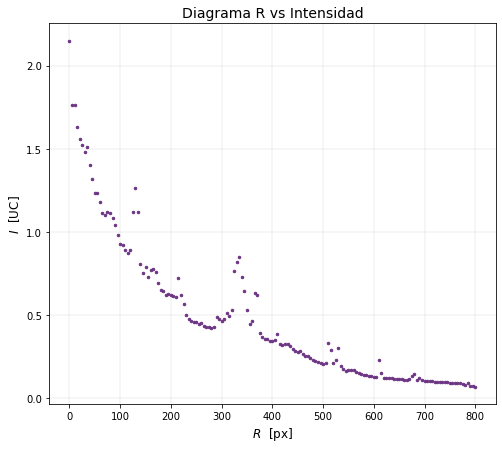

In [12]:
r = data['SMA']
Intensidad = data['INTENS']

plt.figure(figsize=(8,7))
plt.plot(data['SMA'],data['INTENS'], '.', markersize=5, color = '#6C3483')
plt.xlabel('$R~ $ [px]',fontsize = 12)
plt.ylabel('$I~ $ [UC]' ,fontsize = 12)
plt.title("Diagrama R vs Intensidad",fontsize = 14)
plt.grid(linestyle='-', linewidth=0.2)

In [13]:
Disco = data.loc[data['SMA'] > 400]
Disco.head()

,row,SMA,INTENS,INT_ERR,PIX_VAR,RMS,ELLIP,ELLIP_ERR,PA
81,82,405.0,0.348,0.00435,0.269,0.19,0.4113,INDEF,-75.90
82,83,410.0,0.382,0.0225,1.4,0.99,0.4113,INDEF,-75.90
83,84,415.0,0.327,0.00273,0.171,0.121,0.4113,INDEF,-75.90
84,85,420.0,0.321,0.00286,0.18,0.127,0.4113,INDEF,-75.90
85,86,425.0,0.324,0.00362,0.229,0.162,0.4113,INDEF,-75.90


In [14]:
Bulbo = data.loc[data['SMA'] < 100]
Bulbo.head()

,row,SMA,INTENS,INT_ERR,PIX_VAR,RMS,ELLIP,ELLIP_ERR,PA
0,1,0.0,2.15,INDEF,INDEF,INDEF,INDEF,INDEF,INDEF
1,2,5.0,1.76,0.00432,0.0323,0.0228,0.2191,0.0254,-72.78
2,3,10.0,1.76,0.0104,0.0855,0.0605,0.6599,0.0557,-75.88
3,4,15.0,1.63,0.00776,0.0918,0.0649,0.4113,0.0550,-75.90
4,5,20.0,1.56,0.0113,0.156,0.11,0.4113,INDEF,-75.90


In [15]:
import scipy

def function(x, a, b):
    return a*x + b

popt_disco,cov_disco = scipy.optimize.curve_fit(function, Disco['SMA'], Disco['INTENS'])
a_disco,b_disco = popt_disco

x_disco = np.arange(0, 801, 5)
y_disco = function(x_disco, a_disco, b_disco)
print("Estimación del valor a disco : "+ str(a_disco))
print("Estimación del valor b disco : " + str(b_disco))


Estimación del valor a disco : -0.0006516533053267104
Estimación del valor b disco : 0.561604866459343


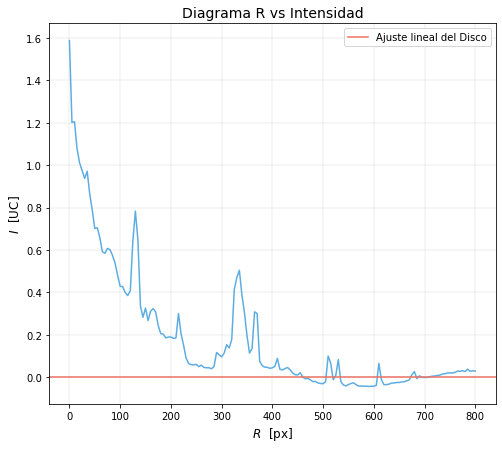

In [16]:
plt.figure(figsize=(8,7))
#plt.plot(Disco['SMA'],Disco['INTENS'], '.', markersize=5, color = '#6C3483')
data['INTENS-AJUSTE'] = data['INTENS']-y_disco
plt.plot(data['SMA'],data['INTENS-AJUSTE'], '-', markersize=5, color = '#5DADE2', label = '')
plt.axhline(y=0, xmin=0, xmax=800, color ='#EC7063', label = 'Ajuste lineal del Disco')

plt.xlabel('$R~ $ [px]',fontsize = 12)
plt.ylabel('$I~ $ [UC]' ,fontsize = 12)
plt.title("Diagrama R vs Intensidad",fontsize = 14)
plt.grid(linestyle='-', linewidth=0.2)

plt.legend()
plt.show()

In [17]:
data_bulbo = data.loc[data['SMA'] < 250] 
data_bulbo = data_bulbo.loc[data['INTENS-AJUSTE'] > np.std(data['INTENS-AJUSTE'])]

In [18]:
popt_bulbo,cov_bulbo = scipy.optimize.curve_fit(function, data_bulbo['SMA'], data_bulbo['INTENS'])
a_bulbo,b_bulbo = popt_bulbo

x_bulbo = np.arange(0, 300, 5)
y_bulbo = function(x_bulbo, a_bulbo, b_bulbo)
print("Estimación del valor a disco : "+ str(a_bulbo))
print("Estimación del valor b disco : " + str(b_bulbo))

Estimación del valor a disco : -0.006001758032293969
Estimación del valor b disco : 1.6731728100171552


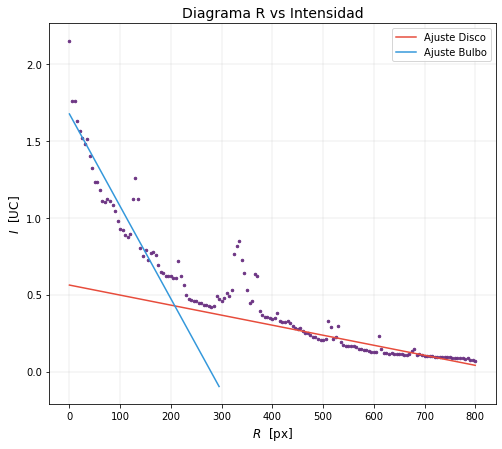

In [20]:
plt.figure(figsize=(8,7))
#plt.plot(Disco['SMA'],Disco['INTENS'], '.', markersize=5, color = '#6C3483')
plt.plot(r,Intensidad, '.', markersize=5, color = '#6C3483')
plt.plot(x_disco,y_disco,color="#E74C3C", label = 'Ajuste Disco')
plt.plot(x_bulbo,y_bulbo,color="#3498DB", label = 'Ajuste Bulbo')

plt.xlabel('$R~ $ [px]',fontsize = 12)
plt.ylabel('$I~ $ [UC]' ,fontsize = 12)
plt.title("Diagrama R vs Intensidad",fontsize = 14)
plt.grid(linestyle='-', linewidth=0.2)

plt.legend()
plt.show()


In [22]:
R = []
V = []
with open(r"NGC2403_Rot_Curve.dat") as datFile:
    R = [data.split()[0] for data in datFile]
with open(r"NGC2403_Rot_Curve.dat") as datFile:
    V = [data.split()[1] for data in datFile]

R.remove(R[0])
R = [float(item) for item in R]

V.remove(V[0])
V = [float(item) for item in V]

df = pd.DataFrame()
df['R(kpc)'] = R
df['V(km/s)'] = V
df

,R(kpc),V(km/s)
0,0.00,47.90000
1,0.05,53.95123
2,0.10,60.44677
3,0.15,66.02752
4,0.20,69.54928
...,...,...
390,19.50,135.39999
391,19.55,135.39999
392,19.60,135.39999
393,19.65,135.39999


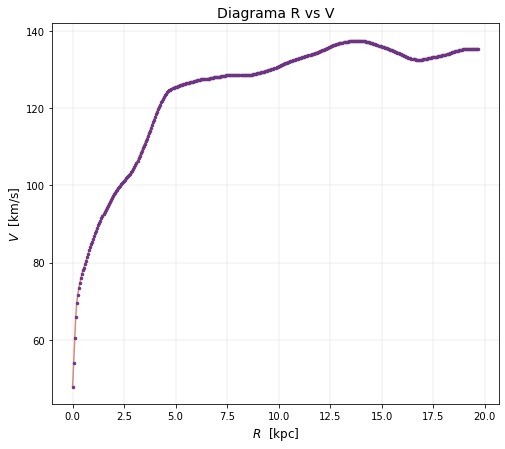

In [27]:
plt.figure(figsize=(8,7))
plt.plot(R,V, '-', color = '#D98880')
plt.plot(R,V, '.', markersize=5, color = '#6C3483')
plt.xlabel('$R~ $ [kpc]',fontsize = 12)
plt.ylabel('$V~ $ [km/s]' ,fontsize = 12)
plt.title("Diagrama R vs V",fontsize = 14)
plt.grid(linestyle='-', linewidth=0.2)

In [37]:
V_max = max(V) #km/s
print('La velocidad máxima de rotación es: ',V_max)
M_B = -11.0*np.log10(V_max) + 3.31
print('La magnitud absoluta es: ',M_B)
m_B = 8.13
d = 10**((m_B-M_B + 5)/5)
d_Mpc = d*1e-6
print('La distancia estimada es:',d,'pc ~',d_Mpc,'Mpc')
#d_real = 8000000
#Err = abs(d-d_real)/d_real*100
#print('Error', Err)

La velocidad máxima de rotación es:  137.49854
La magnitud absoluta es:  -20.211278953964303
La distancia estimada es: 4658603.9522250155 pc ~ 4.6586039522250156 Mpc


In [38]:
Brazo = pd.read_csv("Brazo.csv", sep = ';')
Brazo

,x,y
0,1316.964286,1387.892377
1,1437.500000,1334.080717
2,1457.589286,1354.260090
3,1477.678571,1381.165919
4,1470.982143,1394.618834
5,1497.767857,1401.345291
6,1491.071429,1428.251121
7,1517.857143,1428.251121
8,1517.857143,1448.430493
9,1524.553571,1468.609865


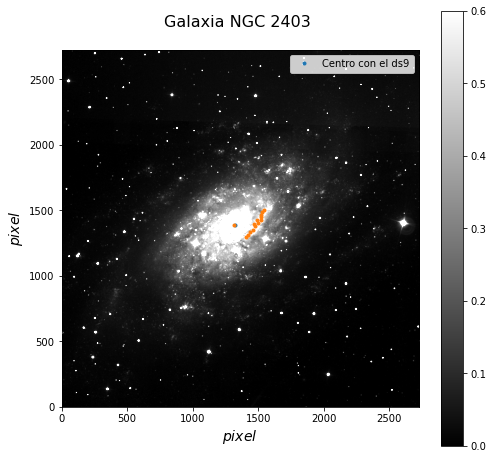

In [39]:
#plt.imshow(img,cmap='Greys',vmin=0,vmax=1)
plt.figure(figsize = (8,8),edgecolor='k')
plt.imshow(img, cmap='gray', vmin=0,vmax=0.6, origin='lower')     # Aquí centramos la imagen y aplicamos 
plt.plot(1323.6082,1387.5688,'.', label = 'Centro con el ds9')
plt.plot(Brazo['x'],Brazo['y'],'.')

plt.title('Galaxia NGC 2403 \n',fontsize=16)
plt.ylabel('$pixel$',fontsize=14)
plt.xlabel('$pixel$',fontsize=14)
#plt.ylim(1000,2090)
#plt.xlim(1000,2073)
plt.legend()
plt.colorbar()

In [40]:
# Pasando a coordenadas polares 
#r = []
#θ1 = []
#for i in range(len(BrazoX)):
#    r.append(np.sqrt(BrazoX[i]**2+BrazoY[i]**2))
#    θ1.append(np.arctan(BrazoY[i]/BrazoX[i]))

In [41]:
x = np.array(Brazo['x']) - CX
y = np.array(Brazo['y']) - CY
r = np.sqrt(x**2+y**2)
θ1 = np.arctan(y/x)

In [42]:
r,θ1

(array([  6.65178915, 125.82653567, 138.05941298, 154.20335999,
        147.54247529, 174.70368598, 172.33393215, 198.46335442,
        203.56030436, 216.67186387, 230.9993379 , 249.01063717,
        124.60710814, 118.55661831]),
 array([-0.04866427, -0.43906553, -0.2436677 , -0.04153426,  0.04780128,
         0.07893829,  0.23831626,  0.20644998,  0.30362993,  0.3833471 ,
         0.45357847,  0.47857628, -0.63254323, -0.82543353]))

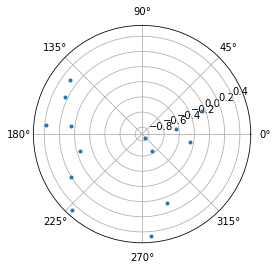

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="polar")
ax.plot(r,θ1, '.')
plt.show()

In [44]:
def function2(θ, a, b):
    return a + b*θ

popt,cov = scipy.optimize.curve_fit(function2,θ1,r)
a,b = popt

theta = np.linspace(0.0, 2*np.pi,100)
r_new = function2(theta, a, b)
print("Estimación del valor a disco : "+ str(a))
print("Estimación del valor b disco : " + str(b))

Estimación del valor a disco : 161.7930626340944
Estimación del valor b disco : 97.15348225085602


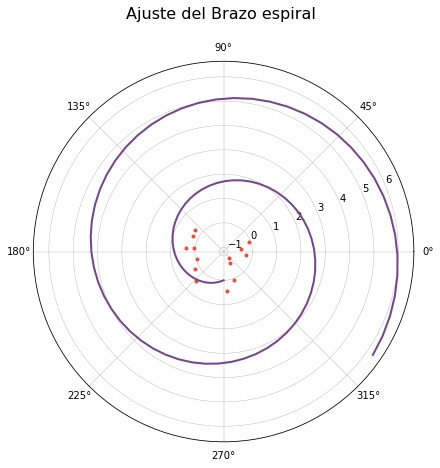

In [45]:
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111, projection="polar")
ax.set_title('Ajuste del Brazo espiral \n',fontsize=16)
ax.plot(r,θ1, '.', color = '#E74C3C')
ax.plot(r_new,theta, color = '#76448A',linewidth=2)
ax.grid(linestyle='-', linewidth=0.4)
plt.show()

2.15 0.790940798518601


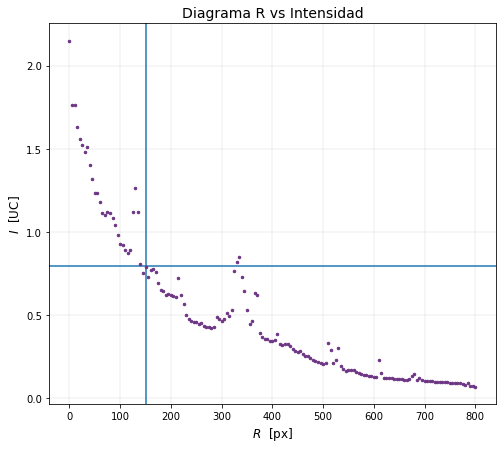

In [30]:
I_0 = data['INTENS'][0]
I_R = I_0/np.e
print(I_0,I_R)
plt.figure(figsize=(8,7))
plt.axhline(y=I_R, xmin=0, xmax=800)
plt.axvline(x=150, ymin=0, ymax=2)
plt.plot(data['SMA'],data['INTENS'], '.', markersize=5, color = '#6C3483')
plt.xlabel('$R~ $ [px]',fontsize = 12)
plt.ylabel('$I~ $ [UC]' ,fontsize = 12)
plt.title("Diagrama R vs Intensidad",fontsize = 14)
plt.grid(linestyle='-', linewidth=0.2)

In [44]:
IntR = data.loc[data['SMA'] > 100]
IntR = data.loc[data['SMA'] < 200]
IntR['SMA'][30], IntR['INTENS'][30],IntR['SMA'][30]/40

(150.0, 0.789, 3.75)

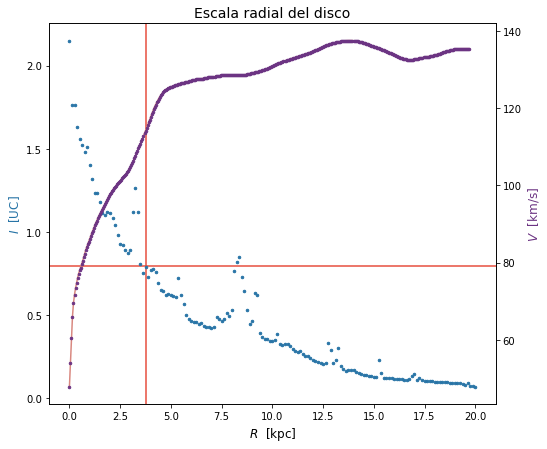

In [43]:
fig, axes = plt.subplots(figsize=(8,7))
plt.title("Escala radial del disco",fontsize = 14)
axes.axhline(y=I_R, xmin=0, xmax=800, color = '#E74C3C')
axes.axvline(x=150/40, ymin=0, ymax=2, color = '#E74C3C')
axes.plot(data['SMA']/40,data['INTENS'], '.', markersize=5, color = '#2874A6')
axes.set_xlabel('$R~ $ [kpc]',fontsize = 12)
axes.set_ylabel('$I~ $ [UC]', color='#2874A6', fontsize = 12)
twin_axes = axes.twinx() 
twin_axes.plot(R,V, '-', color = '#D98880')
twin_axes.plot(R,V, '.', markersize=5, color = '#6C3483')
twin_axes.set_ylabel('$V~ $ [km/s]', color='#6C3483',fontsize = 12)
plt.show()

## Galaxias Elípticas

In [45]:
from photutils.isophote import EllipseGeometry
from photutils.aperture import EllipticalAperture


a =  67.70202539067795
b =  65.33592522494803
e =  0.03494873531591147


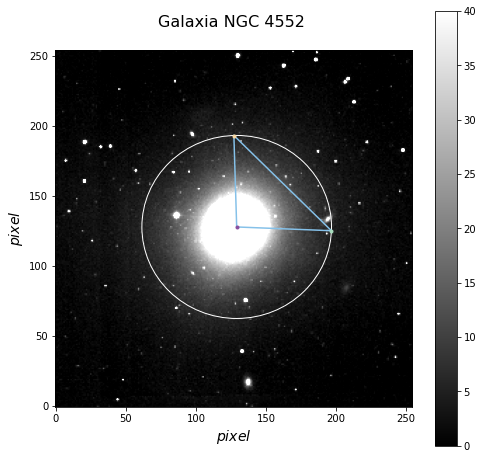

In [46]:
NGC4552 = ft.open('NGC4552.fits',uint=True)
hdr_NGC4552=NGC4552[0].header
img_NGC4552=NGC4552[0].data
NGC4552.close()
type(img_NGC4552)

xx=hdr_NGC4552['naxis1']
yy=hdr_NGC4552['naxis2']

C1 = hdr_NGC4552['CRPIX1']                                               
C2 = hdr_NGC4552['CRPIX2']
img1=np.zeros((yy,xx))

# Encontrando el centro
CX = 129.005
CY = 128

punto1 = [CX,CY]
punto2 = [196.654,125.321]
punto3 = [126.995,193.305]


a = np.sqrt((punto1[0]-punto2[0])**2 +(punto1[1]-punto2[1])**2)
print("a = ",a)
b = np.sqrt((punto1[0]-punto3[0])**2 +(punto1[1]-punto3[1])**2)
print("b = ",b)

e =1-b/a
print("e = ",e)

geometry = EllipseGeometry(x0=CX, y0=CY, sma=a, eps=e, pa=0 * np.pi / 180.)
aper = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma,geometry.sma * (1 - geometry.eps),geometry.pa)

plt.figure(figsize = (8,8),edgecolor='k')

aper.plot(color='white')

plt.plot([punto1[0],punto2[0]],[punto1[1],punto2[1]], color = '#85C1E9')
plt.plot([punto1[0],punto3[0]],[punto1[1],punto3[1]], color = '#85C1E9')
plt.plot([punto2[0],punto3[0]],[punto2[1],punto3[1]], color = '#85C1E9')
plt.plot(punto1[0],punto1[1],'.', color = '#884EA0', label = 'Centro con el ds9')
plt.plot(punto2[0],punto2[1],'.', color = '#A9DFBF', label = 'Punto a')
plt.plot(punto3[0],punto3[1],'.', color = '#FAD7A0', label = 'Punto b')



plt.imshow(img_NGC4552, cmap='gray',vmin=0,vmax=40, origin='lower')     # Aquí centramos la imagen y aplicamos 
#plt.imshow(img, cmap='rainbow', vmin=1000,vmax=3000, origin='lower')     # Aquí centramos la imagen y aplicamos 
plt.title('Galaxia NGC 4552 \n',fontsize=16)
plt.ylabel('$pixel$',fontsize=14)
plt.xlabel('$pixel$',fontsize=14)
#plt.ylim(1000,2090)
#plt.xlim(1000,2073)
plt.colorbar()

a =  34.83352551781115
b =  29.10276017837483
e =  0.164518671430661


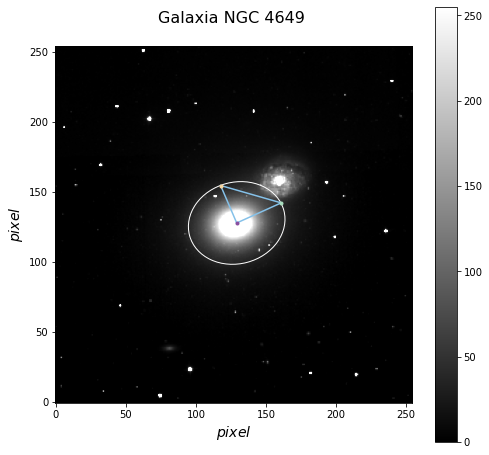

In [47]:
NGC4649 = ft.open('NGC4649.fits',uint=True)
hdr_NGC4649=NGC4649[0].header
img_NGC4649=NGC4649[0].data
NGC4649.close()
type(img_NGC4649)

xx=hdr_NGC4649['naxis1']
yy=hdr_NGC4649['naxis2']

C1 = hdr_NGC4649['CRPIX1']                                               
C2 = hdr_NGC4649['CRPIX2']
img1=np.zeros((yy,xx))

# Encontrando el centro
CX = 129.009
CY = 128

punto1 = [CX,CY]
#punto2 = [140.449,130.916]
#punto3 = [125.645,137.309]
punto2 = [160.753,142.342]
punto3 = [117.534,154.745]

a = np.sqrt((punto1[0]-punto2[0])**2 +(punto1[1]-punto2[1])**2)
print("a = ",a)
b = np.sqrt((punto1[0]-punto3[0])**2 +(punto1[1]-punto3[1])**2)
print("b = ",b)

e = 1-b/a
print("e = ",e)

geometry = EllipseGeometry(x0=CX, y0=CY, sma=a, eps=e, pa=15* np.pi / 180.)
aper = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma,geometry.sma * (1 - geometry.eps),geometry.pa)


plt.figure(figsize = (8,8),edgecolor='k')
aper.plot(color='white')

plt.plot([punto1[0],punto2[0]],[punto1[1],punto2[1]], color = '#85C1E9')
plt.plot([punto1[0],punto3[0]],[punto1[1],punto3[1]], color = '#85C1E9')
plt.plot([punto2[0],punto3[0]],[punto2[1],punto3[1]], color = '#85C1E9')
plt.plot(punto1[0],punto1[1],'.', color = '#884EA0', label = 'Centro con el ds9')
plt.plot(punto2[0],punto2[1],'.', color = '#A9DFBF', label = 'Punto a')
plt.plot(punto3[0],punto3[1],'.', color = '#FAD7A0', label = 'Punto b')



plt.imshow(img_NGC4649, cmap='gray',vmin=0,vmax=np.max(hdr_NGC4649['naxis2']), origin='lower')     # Aquí centramos la imagen y aplicamos 
#plt.imshow(img, cmap='rainbow', vmin=1000,vmax=3000, origin='lower')     # Aquí centramos la imagen y aplicamos 
plt.title('Galaxia NGC 4649 \n',fontsize=16)
plt.ylabel('$pixel$',fontsize=14)
plt.xlabel('$pixel$',fontsize=14)
#plt.ylim(1000,2090)
#plt.xlim(1000,2073)
plt.colorbar()

a =  30.958017539887802
b =  16.97410513105182
e =  0.4517056814383684


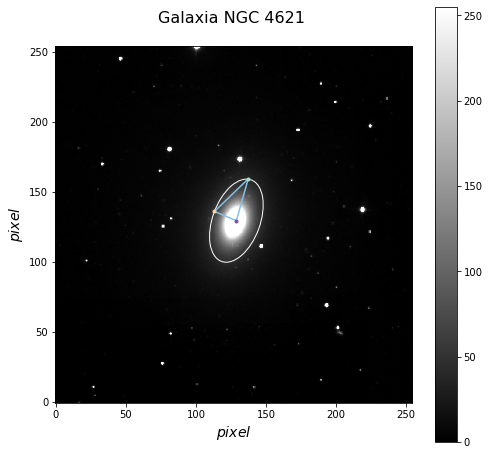

In [48]:
NGC4621 = ft.open('NGC4621.fits',uint=True)
hdr_NGC4621=NGC4621[0].header
img_NGC4621=NGC4621[0].data
NGC4621.close()
type(img_NGC4621)

xx=hdr_NGC4621['naxis1']
yy=hdr_NGC4621['naxis2']

C1 = hdr_NGC4621['CRPIX1']                                               
C2 = hdr_NGC4621['CRPIX2']
img1=np.zeros((yy,xx))

# Encontrando el centro
CX = 128.779
CY = 129.636

punto1 = [CX,CY]

punto2 = [137.206,159.425]
punto3 = [113.141,136.237]

a = np.sqrt((punto1[0]-punto2[0])**2 +(punto1[1]-punto2[1])**2)
print("a = ",a)
b = np.sqrt((punto1[0]-punto3[0])**2 +(punto1[1]-punto3[1])**2)
print("b = ",b)

e = 1-b/a
print("e = ",e)

geometry = EllipseGeometry(x0=CX, y0=CY, sma=a, eps=e, pa=70* np.pi / 180.)
aper = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma,geometry.sma * (1 - geometry.eps),geometry.pa)


plt.figure(figsize = (8,8),edgecolor='k')
aper.plot(color='white')

plt.plot([punto1[0],punto2[0]],[punto1[1],punto2[1]], color = '#85C1E9')
plt.plot([punto1[0],punto3[0]],[punto1[1],punto3[1]], color = '#85C1E9')
plt.plot([punto2[0],punto3[0]],[punto2[1],punto3[1]], color = '#85C1E9')
plt.plot(punto1[0],punto1[1],'.', color = '#884EA0', label = 'Centro con el ds9')
plt.plot(punto2[0],punto2[1],'.', color = '#A9DFBF', label = 'Punto a')
plt.plot(punto3[0],punto3[1],'.', color = '#FAD7A0', label = 'Punto b')



plt.imshow(img_NGC4621, cmap='gray',vmin=0,vmax=np.max(hdr_NGC4649['naxis2']), origin='lower')     # Aquí centramos la imagen y aplicamos 
#plt.imshow(img, cmap='rainbow', vmin=1000,vmax=3000, origin='lower')     # Aquí centramos la imagen y aplicamos 
plt.title('Galaxia NGC 4621 \n',fontsize=16)
plt.ylabel('$pixel$',fontsize=14)
plt.xlabel('$pixel$',fontsize=14)
#plt.ylim(1000,2090)
#plt.xlim(1000,2073)
plt.colorbar()

## Galaxias Espírales

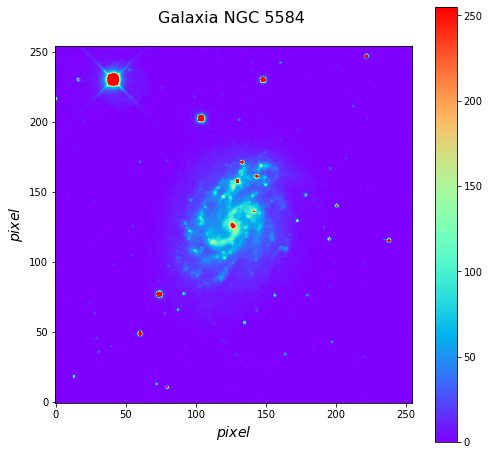

In [225]:
NGC5584 = ft.open('NGC5584_S.fits',uint=True)
hdr_NGC5584=NGC5584[0].header
img_NGC5584=NGC5584[0].data
NGC5584.close()
type(img_NGC5584)

xx=hdr_NGC5584['naxis1']
yy=hdr_NGC5584['naxis2']

C1 = hdr_NGC5584['CRPIX1']                                               
C2 = hdr_NGC5584['CRPIX2']
img1=np.zeros((yy,xx))

plt.figure(figsize = (8,8),edgecolor='k')


plt.imshow(img_NGC5584, cmap='rainbow',vmin=0,vmax=np.max(hdr_NGC5584['naxis2']), origin='lower')     # Aquí centramos la imagen y aplicamos 
#plt.imshow(img, cmap='rainbow', vmin=1000,vmax=3000, origin='lower')     # Aquí centramos la imagen y aplicamos 
plt.title('Galaxia NGC 5584 \n',fontsize=16)
plt.ylabel('$pixel$',fontsize=14)
plt.xlabel('$pixel$',fontsize=14)
#plt.ylim(1000,2090)
#plt.xlim(1000,2073)
plt.colorbar()

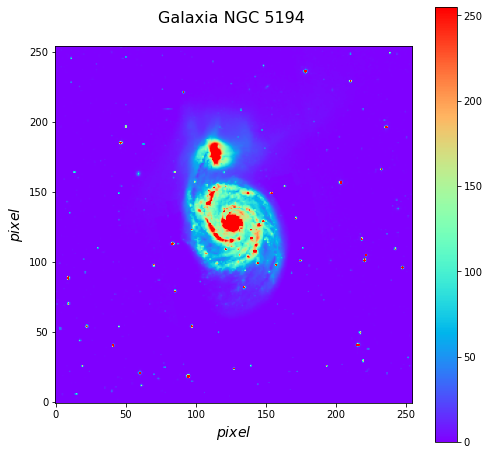

In [210]:
NGC5194 = ft.open('NGC5194_S.fits',uint=True)
hdr_NGC5194=NGC5194[0].header
img_NGC5194=NGC5194[0].data
NGC5194.close()
type(img_NGC5194)

xx=hdr_NGC5194['naxis1']
yy=hdr_NGC5194['naxis2']

C1 = hdr_NGC5194['CRPIX1']                                               
C2 = hdr_NGC5194['CRPIX2']
img1=np.zeros((yy,xx))

plt.figure(figsize = (8,8),edgecolor='k')


plt.imshow(img_NGC5194, cmap='rainbow',vmin=0,vmax=np.max(hdr_NGC5194['naxis2']), origin='lower')     # Aquí centramos la imagen y aplicamos 
#plt.imshow(img, cmap='rainbow', vmin=1000,vmax=3000, origin='lower')     # Aquí centramos la imagen y aplicamos 
plt.title('Galaxia NGC 5194 \n',fontsize=16)
plt.ylabel('$pixel$',fontsize=14)
plt.xlabel('$pixel$',fontsize=14)
#plt.ylim(1000,2090)
#plt.xlim(1000,2073)
plt.colorbar()

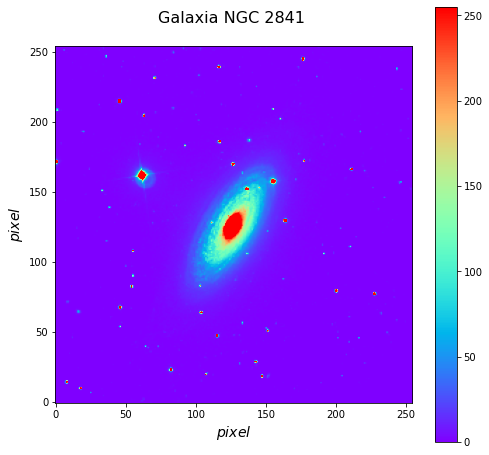

In [214]:
NGC2841 = ft.open('NGC2841_S.fits',uint=True)
hdr_NGC2841=NGC2841[0].header
img_NGC2841=NGC2841[0].data
NGC2841.close()
type(img_NGC2841)

xx=hdr_NGC2841['naxis1']
yy=hdr_NGC2841['naxis2']

C1 = hdr_NGC2841['CRPIX1']                                               
C2 = hdr_NGC2841['CRPIX2']
img1=np.zeros((yy,xx))

plt.figure(figsize = (8,8),edgecolor='k')


plt.imshow(img_NGC2841, cmap='rainbow',vmin=0,vmax=np.max(hdr_NGC2841['naxis2']), origin='lower')     # Aquí centramos la imagen y aplicamos 
#plt.imshow(img, cmap='rainbow', vmin=1000,vmax=3000, origin='lower')     # Aquí centramos la imagen y aplicamos 
plt.title('Galaxia NGC 2841 \n',fontsize=16)
plt.ylabel('$pixel$',fontsize=14)
plt.xlabel('$pixel$',fontsize=14)
#plt.ylim(1000,2090)
#plt.xlim(1000,2073)
plt.colorbar()